In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
import sys 

# Add the yellowbrick library to the path
sys.path.append("../../")
sys.path.append("../")

In [3]:
from download import download_all
import pandas as pd

## The path to the test data sets
FIXTURES  = os.path.join(os.getcwd(), "data")

## Dataset loading mechanisms
datasets = {
    "credit": os.path.join(FIXTURES, "credit", "credit.csv"),
    "concrete": os.path.join(FIXTURES, "concrete", "concrete.csv"),
    "occupancy": os.path.join(FIXTURES, "occupancy", "occupancy.csv"),
}


def load_data(name, download=True):
    """
    Loads and wrangles the passed in dataset by name.
    If download is specified, this method will download any missing files.
    """

    # Get the path from the datasets
    path = datasets[name]
    # Check if the data exists, otherwise download or raise
    if not os.path.exists(path):
        if download:
            download_all()
        else:
            raise ValueError((
                "'{}' dataset has not been downloaded, "
                "use the download.py module to fetch datasets"
            ).format(name))


    # Return the data frame
    return pd.read_csv(path)

In [4]:

import yellowbrick as yb 

In [5]:
data = load_data('occupancy')

# Specify the features of interest and the classes of the target
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.occupancy.as_matrix()


In [6]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [7]:
X


array([[  2.31800000e+01,   2.72720000e+01,   4.26000000e+02,
          7.21250000e+02,   4.79298818e-03],
       [  2.31500000e+01,   2.72675000e+01,   4.29500000e+02,
          7.14000000e+02,   4.78344095e-03],
       [  2.31500000e+01,   2.72450000e+01,   4.26000000e+02,
          7.13500000e+02,   4.77946352e-03],
       ..., 
       [  2.08900000e+01,   2.77450000e+01,   4.23500000e+02,
          1.52150000e+03,   4.23681810e-03],
       [  2.08900000e+01,   2.80225000e+01,   4.18750000e+02,
          1.63200000e+03,   4.27948547e-03],
       [  2.10000000e+01,   2.81000000e+01,   4.09000000e+02,
          1.86400000e+03,   4.32073200e-03]])

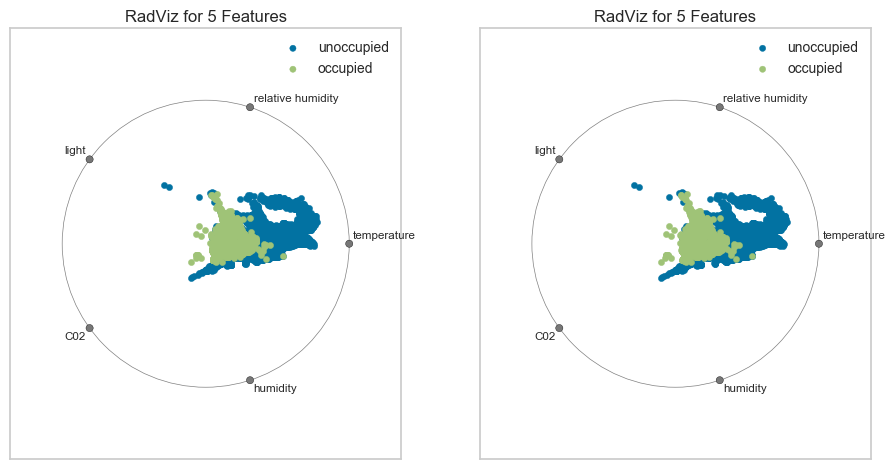

In [8]:
from yellowbrick.features.radviz import RadViz
from yellowbrick.features.pcoords import ParallelCoordinates
from yellowbrick.base import VisualizerGrid

visualizers = [#RadViz(classes=classes, features=features),
               RadViz(classes=classes, features=features),
               RadViz(classes=classes, features=features),
              #ParallelCoordinates(classes=classes, features=features)
              ]

vg = VisualizerGrid(visualizers, ncols=2)
vg.fit(X,y)
vg.show()


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

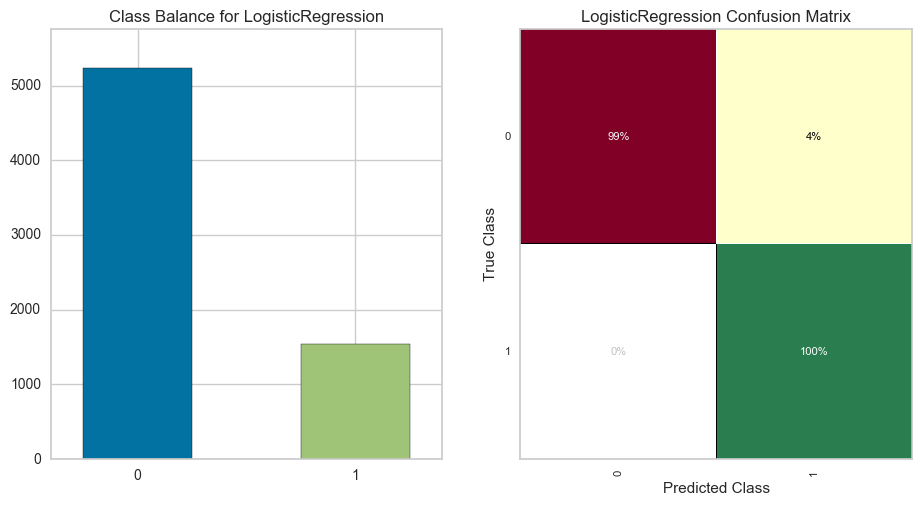

In [10]:
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassBalance

model = LogisticRegression()

visualizers = [ClassBalance(model),ConfusionMatrix(model)]
vg = VisualizerGrid(visualizers, ncols=2)
vg.fit(X_train, y_train)
vg.score(X_test, y_test)
vg.show()

In [11]:
y


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

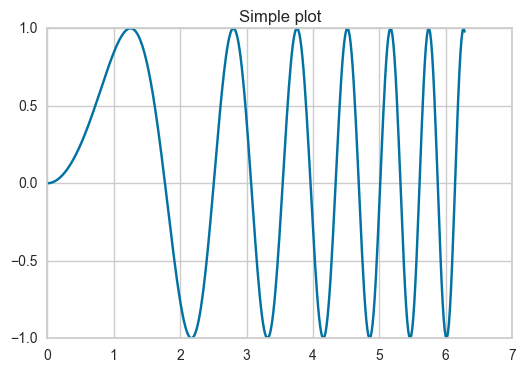

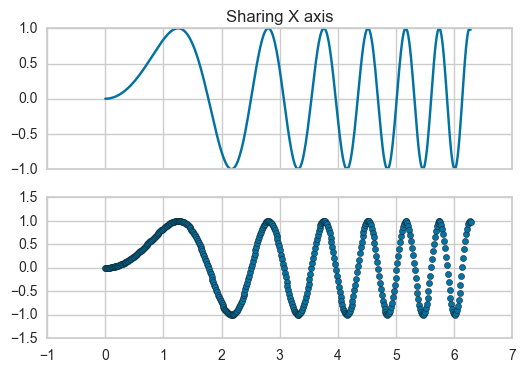

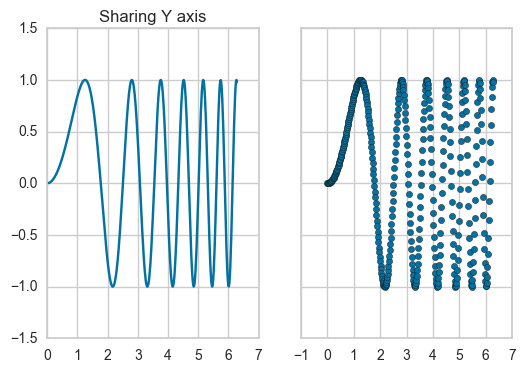

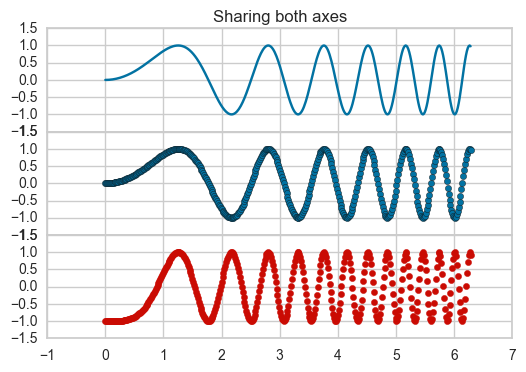

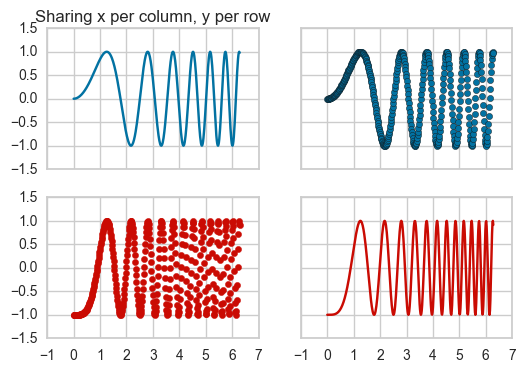

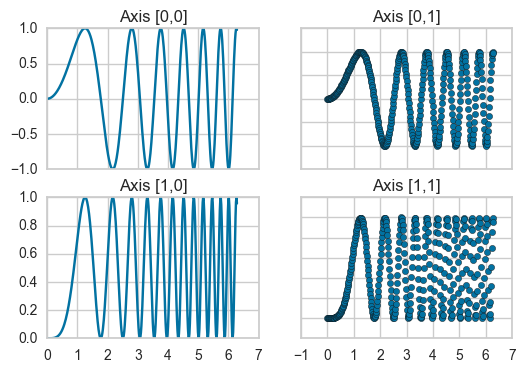

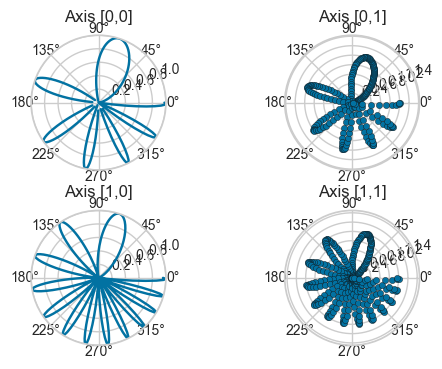

In [12]:
"""Examples illustrating the use of plt.subplots().

This cell is for reference when working with subplots, and is copied from the matplotlib docs

See other cells for examples of using the VisualizerGrid itself

This function creates a figure and a grid of subplots with a single call, while
providing reasonable control over how the individual plots are created.  For
very refined tuning of subplot creation, you can still use add_subplot()
directly on a new figure.
"""



# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

plt.close('all')

# Just a figure and one subplot
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(x, y)
axarr[0].set_title('Sharing X axis')
axarr[1].scatter(x, y)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

# row and column sharing
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(x, y)
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
ax4.plot(x, 2 * y ** 2 - 1, color='r')

# Four axes, returned as a 2-d array
f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

# Four polar axes
f, axarr = plt.subplots(2, 2, subplot_kw=dict(projection='polar'))
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; make subplots farther from each other.
f.subplots_adjust(hspace=0.3)

plt.show()